## Generate the plots for the wild mammal biomass paper

In [2]:
%run -m generate_maps

# plot_mass_density_map_from_file()

/home/dan/anaconda3/lib/python3.7/site-packages/geopandas/_compat.py:88: UserWarning: The Shapely GEOS version (3.6.2-CAPI-1.10.2 4d2925d6) is incompatible with the GEOS version PyGEOS was compiled with (3.8.1-CAPI-1.13.3). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [3]:
gridded_mammal_mass = gpd.read_file('map_data/gridded_mammal_mass_dec20/gridded_mammal_mass.shp')
gridded_mammal_mass = gridded_mammal_mass.rename(columns={"total_ma_1": "total_mass_Mt"})
gridded_mammal_mass = gridded_mammal_mass.rename(columns={"total_ma_2": "total_mass_kg"})
gridded_mammal_mass = gridded_mammal_mass.rename(columns={"total_ma_3": "total_mass_kg_km2"})

In [4]:
continents_polygon = gpd.GeoDataFrame(get_continent_data_from_file()).rename(columns={0: "geometry"})
continents_polygon.crs = "EPSG:6933"

In [5]:
# %run -m generate_maps
# from datetime import datetime
# start = datetime.now().time() 
# print("start =", start)
# continents = overlay_and_sum_continent(1000)
# end = datetime.now().time() 
# print("end =", end)

<AxesSubplot:label='verbosity coefficient', title={'center':'Wild Mammal Mass Density'}>

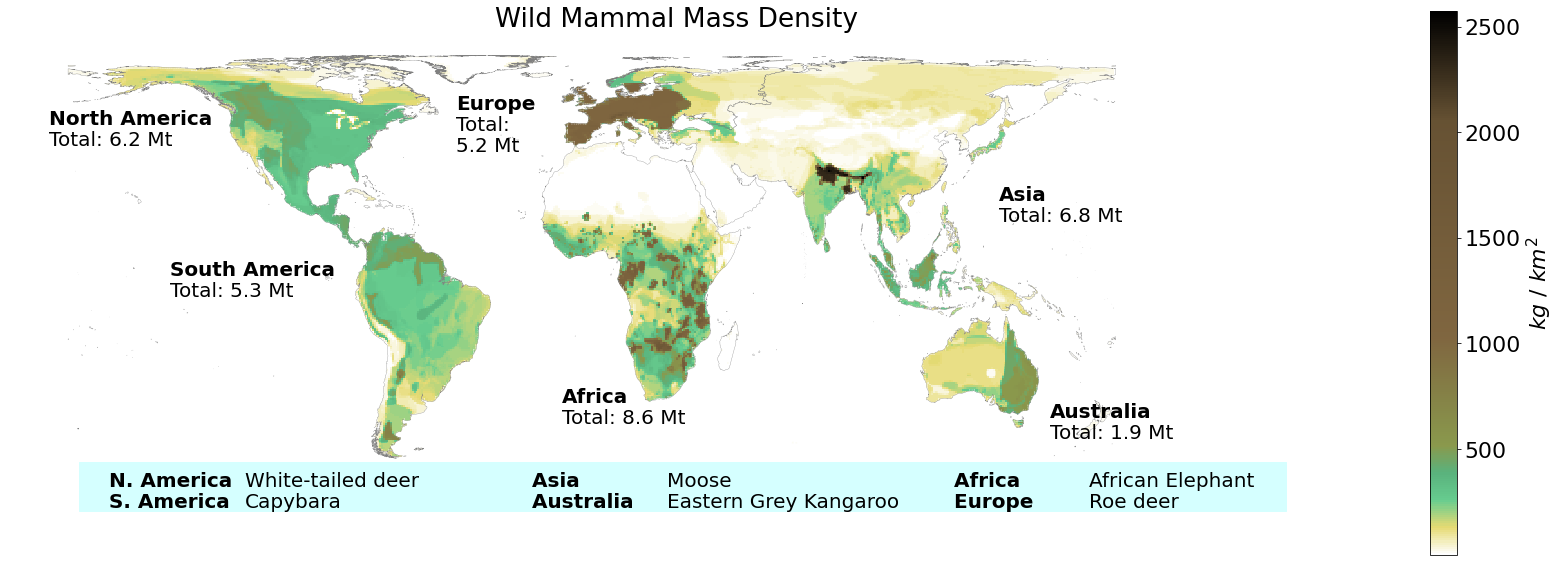

In [25]:
import matplotlib.patches as patches

plt.rcParams["figure.figsize"] = (30, 10)
font = {'weight': 'normal',
        'size': 22}
plt.rc('font', **font)
fig, ax = pyplot.subplots(1, 1)
ax.axis('off')
# path_effects=[pe.withStroke(linewidth=4, foreground="white")]
# cmap = plt.cm.get_cmap('gist_earth').reversed()
cmap = gen_custom_cmap()
ax.set_label('verbosity coefficient')
ax.set_title('Wild Mammal Mass Density')
base = gridded_mammal_mass.plot(column='total_mass_kg_km2' ,ax=ax, legend=True, cmap=cmap,
                         legend_kwds={'label': r"$kg$"+" / "+r"$km^2$"})
continents = ['North America','South America','Asia','Australia','Africa','Europe']
continents_short = ['N. America','S. America','Asia','Australia','Africa','Europe']
top_conributors = ['White-tailed deer','Capybara','Moose','Eastern Grey Kangaroo',
                   'African Elephant','Roe deer']
total_mass = ['6.2 Mt','5.3 Mt','6.8 Mt','1.9 Mt','8.6 Mt','']

mult_x = 10**7
mult_y = 10**6

locations = [(-1.8*mult_x,5*mult_y),      #North America
             (-1.4*mult_x,-0.0*mult_y),   #South America
             (1.35*mult_x,2.5*mult_y),    #Asia
             (1.52*mult_x,-4.7*mult_y),   #Australia
             (-0.1*mult_x,-4.2*mult_y),   #Africa
             (-0.45*mult_x,5.5*mult_y)    #Europe
            ]

delta = (0,7*10**5)


for continent, loc, mass, species in zip(continents, locations, total_mass, top_conributors):
    base.annotate(text=continent, xy=loc, ha='left', size = 20, weight = 'bold')
#     base.annotate(text='Total mass: '+mass, xy=np.subtract(loc, np.multiply(delta,(1,1))), ha='left', size = 20)
    base.annotate(text='Total: '+mass, xy=np.subtract(loc, np.multiply(delta,(1,1))), ha='left', size = 20)
base.annotate(text='5.2 Mt', xy=np.subtract(locations[5], np.multiply(delta,(1,2))), ha='left', size = 20)

rect = patches.Rectangle((-1.7*mult_x,-7.8*mult_y), 4*mult_x, 1.6*mult_y, color = '#d5ffff')
base.add_patch(rect)

# base.annotate(text = 'Top contributors by continent', xy = (-1.9*mult_x,-1.9*mult_y),size = 20, 
#               weight = 'bold', color = 'black')

n_deltas  = [0,1,0,1,0,1]
xlocs = [-1.6,-1.6,-0.2,-0.2,1.2,1.2]
for continent, species, n, xloc in zip(continents_short, top_conributors, n_deltas, xlocs):
    base.annotate(text = continent+" ", 
                  xy = np.subtract((xloc*mult_x,-7*mult_y), np.multiply(delta,(1,n))),
                 size = 20,weight = 'bold')
    base.annotate(text = species, 
                  xy = np.subtract(((xloc+0.45)*mult_x,-7*mult_y), np.multiply(delta,(1,n))),
                 size = 20)

continents_polygon.plot(ax=base, fc='none', ec='grey', linewidth=0.3)

<AxesSubplot:label='verbosity coefficient', title={'center':'Wild Mammal Mass Density'}>

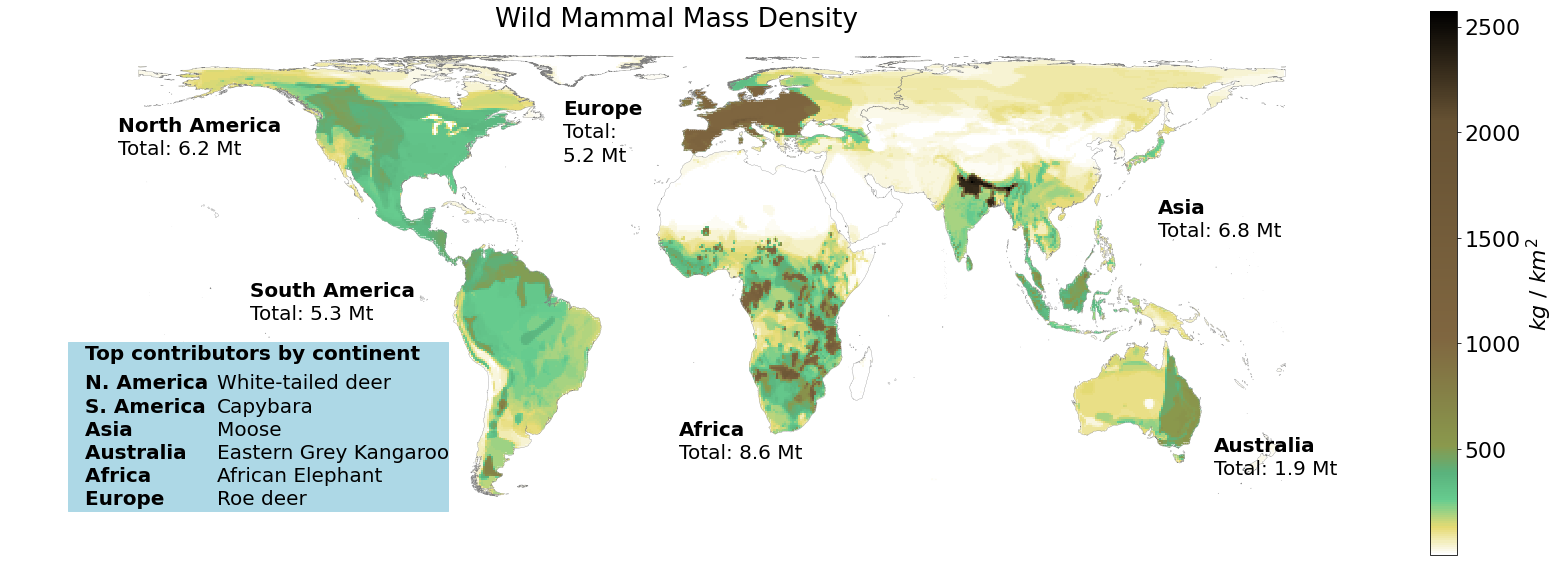

In [6]:
# import matplotlib.patches as patches

# plt.rcParams["figure.figsize"] = (30, 10)
# font = {'weight': 'normal',
#         'size': 22}
# plt.rc('font', **font)
# fig, ax = pyplot.subplots(1, 1)
# ax.axis('off')
# # path_effects=[pe.withStroke(linewidth=4, foreground="white")]
# # cmap = plt.cm.get_cmap('gist_earth').reversed()
# cmap = gen_custom_cmap()
# ax.set_label('verbosity coefficient')
# ax.set_title('Wild Mammal Mass Density')
# base = gridded_mammal_mass.plot(column='total_mass_kg_km2' ,ax=ax, legend=True, cmap=cmap,
#                          legend_kwds={'label': r"$kg$"+" / "+r"$km^2$"})
# continents = ['North America','South America','Asia','Australia','Africa','Europe']
# continents_short = ['N. America','S. America','Asia','Australia','Africa','Europe']
# top_conributors = ['White-tailed deer','Capybara','Moose','Eastern Grey Kangaroo',
#                    'African Elephant','Roe deer']
# total_mass = ['6.2 Mt','5.3 Mt','6.8 Mt','1.9 Mt','8.6 Mt','']

# mult_x = 10**7
# mult_y = 10**6

# locations = [(-1.8*mult_x,5*mult_y),      #North America
#              (-1.4*mult_x,-0.0*mult_y),   #South America
#              (1.35*mult_x,2.5*mult_y),    #Asia
#              (1.52*mult_x,-4.7*mult_y),   #Australia
#              (-0.1*mult_x,-4.2*mult_y),   #Africa
#              (-0.45*mult_x,5.5*mult_y)    #Europe
#             ]

# delta = (0,7*10**5)


# for continent, loc, mass, species in zip(continents, locations, total_mass, top_conributors):
#     base.annotate(text=continent, xy=loc, ha='left', size = 20, weight = 'bold')
# #     base.annotate(text='Total mass: '+mass, xy=np.subtract(loc, np.multiply(delta,(1,1))), ha='left', size = 20)
#     base.annotate(text='Total: '+mass, xy=np.subtract(loc, np.multiply(delta,(1,1))), ha='left', size = 20)
# base.annotate(text='5.2 Mt', xy=np.subtract(locations[5], np.multiply(delta,(1,2))), ha='left', size = 20)

# rect = patches.Rectangle((-1.95*mult_x,-6.5*mult_y), 1.15*mult_x, 5.1*mult_y, color = 'lightblue')
# base.add_patch(rect)

# base.annotate(text = 'Top contributors by continent', xy = (-1.9*mult_x,-1.9*mult_y),size = 20, 
#               weight = 'bold', color = 'black')
# n_deltas  = [0,1,2,3,4,5]
# for continent, species, n in zip(continents_short, top_conributors, n_deltas):
#     base.annotate(text = continent+" ", 
#                   xy = np.subtract((-1.9*mult_x,-2.8*mult_y), np.multiply(delta,(1,n))),
#                  size = 20,weight = 'bold')
#     base.annotate(text = species, 
#                   xy = np.subtract((-1.5*mult_x,-2.8*mult_y), np.multiply(delta,(1,n))),
#                  size = 20)

# continents_polygon.plot(ax=base, fc='none', ec='grey', linewidth=0.3)

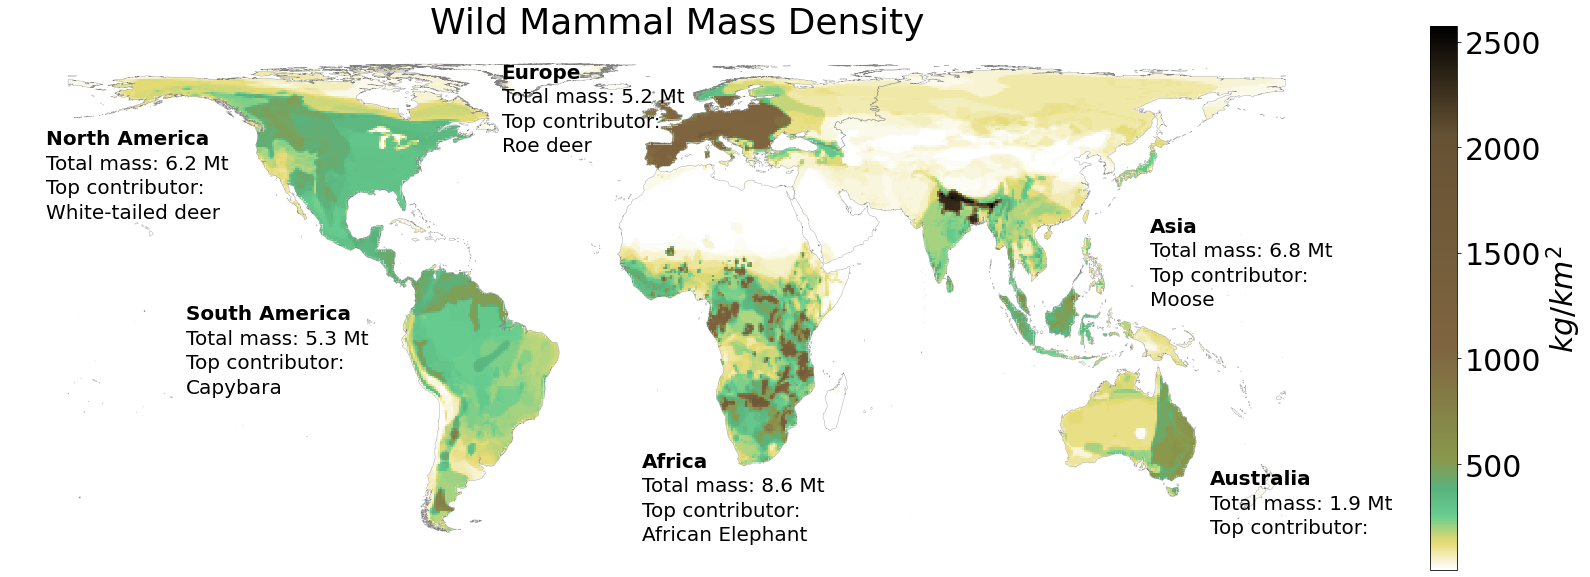

In [151]:
plt.rcParams["figure.figsize"] = (30, 10)

font = {'weight': 'normal',
        'size': 30}
plt.rc('font', **font)
fig, ax = pyplot.subplots(1, 1)
ax.axis('off')

cmap = gen_custom_cmap()
ax.set_label('verbosity coefficient')
ax.set_title('Wild Mammal Mass Density')
base = gridded_mammal_mass.plot(column='total_mass_kg_km2' ,ax=ax, legend=True, cmap=cmap,
                         legend_kwds={'label': r"$kg/km^2$"})
continents = ['North America','South America','Asia','Australia','Africa','Europe']
top_conributors = ['White-tailed deer','Capybara','Moose','Eastern Grey Kangaroo','African Elephant','Roe deer']
total_mass = ['6.2','5.3','6.8','1.9','8.6','5.2']

mult_x = 10**7
mult_y = 10**6

locations = [(-1.8*mult_x,5*mult_y),      #North America
             (-1.4*mult_x,-0.0*mult_y),   #South America
             (1.35*mult_x,2.5*mult_y),    #Asia
             (1.52*mult_x,-4.7*mult_y),   #Australia
             (-0.1*mult_x,-4.2*mult_y),   #Africa
             (-0.5*mult_x,6.9*mult_y)       #Europe
            ]

delta = (0,7*10**5)


for continent, loc, mass, species in zip(continents, locations, total_mass, top_conributors):
    base.annotate(text=continent, xy=loc, ha='left', size = 20, weight = 'bold')
    base.annotate(text='Total mass: '+mass+' Mt', xy=np.subtract(loc, np.multiply(delta,(1,1))), ha='left', size = 20)
    base.annotate(text='Top contributor: ', xy=np.subtract(loc, np.multiply(delta,(1,2))), ha='left', size = 20)
    base.annotate(species, xy=np.subtract(loc, np.multiply(delta,(1,3))), ha='left', size = 20)

continents_polygon.plot(ax=base, fc='none', ec='grey', linewidth=0.3)
fig.savefig('foo.svg', format='svg', dpi=1200)

In [118]:
foo = pd.read_csv('map_data/lior_results_2.csv')

In [124]:
pd.set_option('display.max_rows', 100)
foo.sort_values(by = 'estimated_mass', ascending = False)[0:100]

,binomial,estimated_pop,AdultBodyMassG,estimated_mass,pop_density,Range
2985,Odocoileus virginianus,4.100000e+07,7.590125e+04,3.111951,2.845121,1.441064e+07
2029,Loxodonta africana,5.416835e+05,3.824540e+06,2.071690,0.256641,2.110665e+06
104,Alces alces,2.100000e+06,4.619008e+05,0.969992,0.090924,2.309628e+07
1718,Hydrochoerus hydrochaeris,1.801695e+07,4.814491e+04,0.867425,1.344961,1.339589e+07
2075,Macropus giganteus,2.200000e+07,3.340989e+04,0.735018,9.860455,2.231134e+06
481,Castor canadensis,3.800519e+07,1.812441e+04,0.688822,2.419480,1.570800e+07
538,Cervus elaphus,2.435500e+06,2.408671e+05,0.586632,0.659465,3.693146e+06
3934,Rusa unicolor,2.882299e+06,1.775229e+05,0.511674,0.380733,7.570388e+06
2984,Odocoileus hemionus,6.000000e+06,8.456057e+04,0.507363,0.946362,6.340068e+06
463,Capreolus capreolus,2.250000e+07,2.250201e+04,0.506295,3.493648,6.440260e+06
